In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('//content/drive/MyDrive/Mtech /Dissertation/data_output/raw_data.csv')

In [ ]:
data.columns

Index(['nctid', 'status', 'why_stop', 'label', 'phase', 'diseases', 'icdcodes',
       'drugs', 'smiless', 'criteria'],
      dtype='object')

In [ ]:
mask = data['status'] == 'completed'
data['label'] = mask.map({True: 1, False: 0})

In [ ]:
use_data= use_data.fillna("")
use_data['combine_data'] = use_data['why_stop_updated'] + "  " + use_data["diseases_updated"] + "  " + use_data["drugs_updated"] + use_data["criteria_updated"]

In [ ]:
use_data

,why_stop_updated,diseases_updated,drugs_updated,criteria_updated,label,combine_data
0,protocol amended statsaccrual changes pi,aggressive nonhodgkin lymphoma bcell nonhodgki...,cyclophosphamide doxorubicin hydrochloride pre...,inclusion criteria patient confirmed diagnos...,0,protocol amended statsaccrual changes pi aggr...
1,,smoking cessation,cytisine placebo comparator,inclusion criteria 1 male female subjects age...,1,smoking cessation cytisine placebo comparat...
2,,rheumatoid arthritis,placebo matched prednisone prednisone,inclusion criteria tocilizumabexperienced par...,1,rheumatoid arthritis placebo matched predni...
3,,idiopathic pulmonary fibrosis,nintedanib pirfenidone,inclusion criteria written informed consent ...,1,idiopathic pulmonary fibrosis nintedanib pi...
4,,type 2 diabetes mellitus,sitagliptin placebo ipragliflozin,inclusion criteria type 2 diabetes mellitus ...,1,type 2 diabetes mellitus sitagliptin placeb...
...,...,...,...,...,...,...
14566,,type 2 diabetes mellitus,dulaglutide insulin glargine metformin sulfony...,inclusion criteria type 2 diabetes mellitus ...,1,type 2 diabetes mellitus dulaglutide insuli...
14567,,idiopathic parkinson disease,rotigotine placebo patch ldopa,inclusion criteria inclusion criteria indep...,1,idiopathic parkinson disease rotigotine pla...
14568,,cystic fibrosis,azli placebo match azli tobramycin inhalation ...,inclusion criteria confirmed diagnosis cf ...,1,cystic fibrosis azli placebo match azli tob...
14569,closed prolonged enrollment timelines,renal cell carcinoma,axitinib,inclusion criteria locally recurrent metasta...,0,closed prolonged enrollment timelines renal c...


In [ ]:
tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(use_data['combine_data'])  # Replace 'diseases' with the appropriate column name
X_text = tokenizer.texts_to_sequences(use_data['combine_data'])  # Convert text to sequences
X_text = pad_sequences(X_text, maxlen=500)  # Pad sequences if needed


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_text, use_data['label'], test_size=0.4, random_state=42, stratify = use_data['label'])

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((8742, 500), (5829, 500), (8742,))

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 300
max_sequence_length = X_train.shape[1]

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          16079100  
                                                                 
 bidirectional (Bidirection  (None, 500, 128)          186880    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 500, 128)          98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 500, 64)           8256      
                                                                 
 dropout (Dropout)           (None, 500, 64)           0         
                                                                 
 dense_1 (Dense)             (None, 500, 1)            6

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
110/110 [==============================] - 504s 4s/step - loss: 0.6052 - accuracy: 0.7023 - val_loss: 0.5878 - val_accuracy: 0.7064
Epoch 2/10
110/110 [==============================] - 475s 4s/step - loss: 0.5424 - accuracy: 0.7455 - val_loss: 0.5197 - val_accuracy: 0.7546
Epoch 3/10
110/110 [==============================] - 496s 5s/step - loss: 0.4020 - accuracy: 0.8532 - val_loss: 0.4148 - val_accuracy: 0.8569
Epoch 4/10
110/110 [==============================] - 493s 4s/step - loss: 0.4424 - accuracy: 0.8130 - val_loss: 0.4814 - val_accuracy: 0.8050
Epoch 5/10
110/110 [==============================] - 498s 5s/step - loss: 0.4200 - accuracy: 0.8409 - val_loss: 0.4754 - val_accuracy: 0.8105
Epoch 6/10
110/110 [==============================] - 489s 4s/step - loss: 0.3664 - accuracy: 0.8610 - val_loss: 0.3936 - val_accuracy: 0.8585
Epoch 7/10
110/110 [==============================] - 488s 4s/step - loss: 0.2985 - accuracy: 0.8959 - val_loss: 0.4131 - val_accuracy: 0.8603

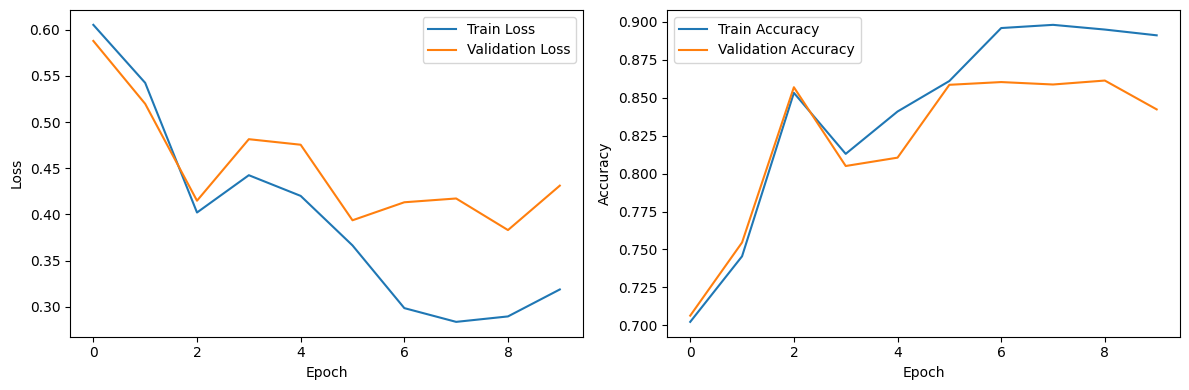

In [ ]:
# Plot the training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

183/183 [==============================] - 108s 593ms/step - loss: 0.3988 - accuracy: 0.8569
Test Loss: 0.3988424837589264, Test Accuracy: 0.8568606376647949
